Here, the library tensorflow.keras.datasets is used to load the IMDB dataset in the workspace.


In [62]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [63]:
>>> train_data[0]
>>> train_labels[0]

1

Decoding reviews back to English words


In [64]:

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


Dataset is being vectorized here by create an all zero matrix of shape (len(sequences), dimension)

In [65]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results




Vectorized the training and test data

In [66]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building the model using the activation function Relu.

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [68]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Setting aside a validation set

In [69]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model with a batch size of 512 and epochs size of 20

In [70]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5272 - accuracy: 0.7904 - val_loss: 0.4012 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3196 - accuracy: 0.9022 - val_loss: 0.3133 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2337 - accuracy: 0.9259 - val_loss: 0.2817 - val_accuracy: 0.8939
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1844 - accuracy: 0.9417 - val_loss: 0.3286 - val_accuracy: 0.8662
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1501 - accuracy: 0.9527 - val_loss: 0.2772 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1278 - accuracy: 0.9593 - val_loss: 0.2896 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1039 - accuracy: 0.9684 - val_loss: 0.3230 - val_accuracy: 0.8765
Epoch 8/20
30

In [71]:
>>> history_dict = history.history
>>> history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

Plotting the training and validation loss

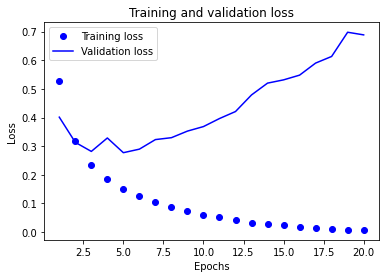

In [72]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

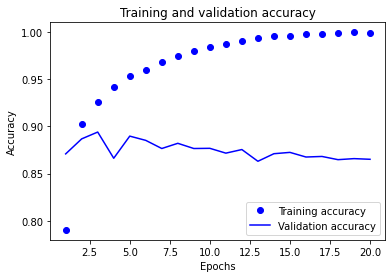

In [73]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model from scratch

In [74]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.4669 - accuracy: 0.8170
Epoch 2/3
49/49 [==============================] - 0s 10ms/step - loss: 0.2655 - accuracy: 0.9075
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2841 - accuracy: 0.8874


In [75]:
>>> results

[0.2840519845485687, 0.887440025806427]

Using a trained network to generate predications on new data

In [76]:
>>> model.predict(x_test)

array([[0.22740583],
       [0.999673  ],
       [0.8302874 ],
       ...,
       [0.11376282],
       [0.07774394],
       [0.49447197]], dtype=float32)

Model number 2

In [77]:
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.4578 - accuracy: 0.8210
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2618 - accuracy: 0.9099
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2006 - accuracy: 0.9300
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1672 - accuracy: 0.9418
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3369 - accuracy: 0.8716


In [78]:
results

[0.3368835151195526, 0.8716400265693665]

Model 1 trained with 3 layers

In [79]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.5380 - accuracy: 0.7892 - val_loss: 0.4214 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3351 - accuracy: 0.9001 - val_loss: 0.3193 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2373 - accuracy: 0.9271 - val_loss: 0.2851 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1848 - accuracy: 0.9411 - val_loss: 0.2734 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1474 - accuracy: 0.9536 - val_loss: 0.2865 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1182 - accuracy: 0.9625 - val_loss: 0.3086 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.3212 - val_accuracy: 0.8812
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

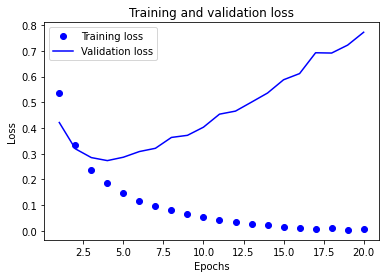

In [80]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

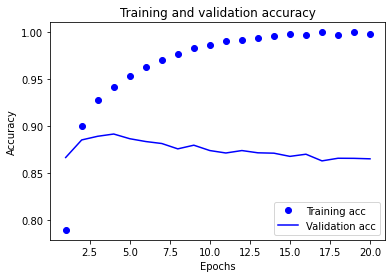

In [81]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
model_11.fit(x_train, y_train, epochs=10, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 0.2357 - accuracy: 0.9466
Epoch 2/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1359 - accuracy: 0.9610
Epoch 3/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1068 - accuracy: 0.9696
Epoch 4/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0831 - accuracy: 0.9751
Epoch 5/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0668 - accuracy: 0.9810
Epoch 6/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0528 - accuracy: 0.9856
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0412 - accuracy: 0.9899
Epoch 8/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0321 - accuracy: 0.9914
Epoch 9/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0228 - accuracy: 0.9948
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.2841 - accuracy: 0.8874


[0.2840519845485687, 0.887440025806427]

Training model with 32 units

In [83]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4943 - accuracy: 0.7686 - val_loss: 0.3412 - val_accuracy: 0.8773
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2698 - accuracy: 0.9032 - val_loss: 0.3221 - val_accuracy: 0.8694
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1942 - accuracy: 0.9340 - val_loss: 0.2736 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1550 - accuracy: 0.9462 - val_loss: 0.3575 - val_accuracy: 0.8639
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1187 - accuracy: 0.9618 - val_loss: 0.3297 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0999 - accuracy: 0.9674 - val_loss: 0.3309 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0764 - accuracy: 0.9760 - val_loss: 0.4015 - val_accuracy: 0.8625
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

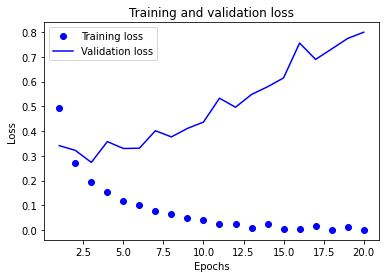

In [84]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

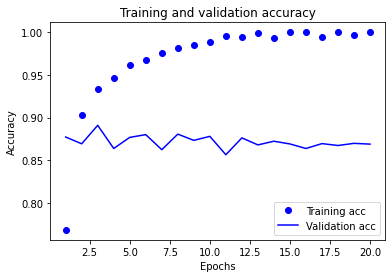

In [85]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2353 - accuracy: 0.9446
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9634
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0841 - accuracy: 0.9737
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0572 - accuracy: 0.9835
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9891
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0260 - accuracy: 0.9934
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0181 - accuracy: 0.9954
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.8448 - accuracy: 0.8535


[0.8448400497436523, 0.8535199761390686]

Training model with 64 units

In [87]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.4821 - accuracy: 0.7689 - val_loss: 0.3380 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2582 - accuracy: 0.9038 - val_loss: 0.2885 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1891 - accuracy: 0.9304 - val_loss: 0.2732 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1415 - accuracy: 0.9496 - val_loss: 0.2956 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0976 - accuracy: 0.9673 - val_loss: 0.3963 - val_accuracy: 0.8639
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0768 - accuracy: 0.9743 - val_loss: 0.3548 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.4330 - val_accuracy: 0.8694
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

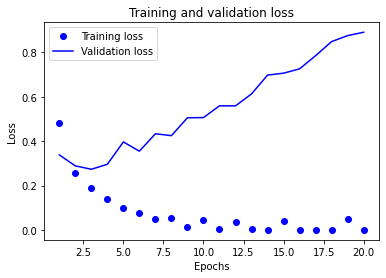

In [88]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

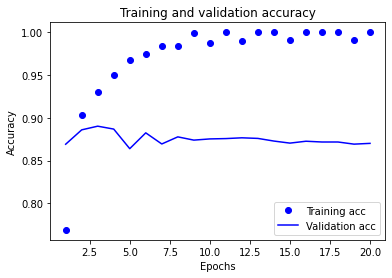

In [89]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [90]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1946 - accuracy: 0.9470
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.9683
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0546 - accuracy: 0.9825
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 0.9958
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.9964
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0124 - accuracy: 0.9969
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 1.0619 - accuracy: 0.8590


[1.061914086341858, 0.859000027179718]

Training the model with 128 units

In [91]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.4917 - accuracy: 0.7666 - val_loss: 0.3295 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2562 - accuracy: 0.9027 - val_loss: 0.3693 - val_accuracy: 0.8426
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1674 - accuracy: 0.9369 - val_loss: 0.3170 - val_accuracy: 0.8765
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1351 - accuracy: 0.9495 - val_loss: 0.3232 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0856 - accuracy: 0.9696 - val_loss: 0.3346 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.3773 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.3834 - val_accuracy: 0.8821
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

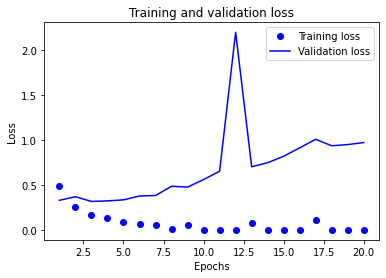

In [92]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

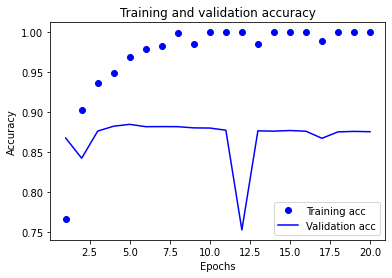

In [93]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2043 - accuracy: 0.9449
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9740
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0399 - accuracy: 0.9883
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0191 - accuracy: 0.9946
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9945
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0236 - accuracy: 0.9964
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 1.0599 - accuracy: 0.8675


[1.0598992109298706, 0.8674799799919128]

Loss Function

In [95]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1878 - accuracy: 0.7769 - val_loss: 0.1365 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1048 - accuracy: 0.8974 - val_loss: 0.1003 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0713 - accuracy: 0.9265 - val_loss: 0.0901 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0545 - accuracy: 0.9435 - val_loss: 0.0829 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0435 - accuracy: 0.9551 - val_loss: 0.0846 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.9629 - val_loss: 0.0894 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0295 - accuracy: 0.9715 - val_loss: 0.0850 - val_accuracy: 0.8841
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

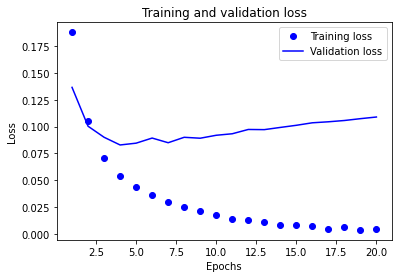

In [96]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

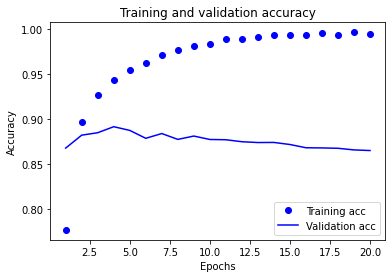

In [97]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [98]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9459
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0334 - accuracy: 0.9617
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0281 - accuracy: 0.9692
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0235 - accuracy: 0.9760
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0209 - accuracy: 0.9786
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0.9809
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9830
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1198 - accuracy: 0.8575


[0.11975634098052979, 0.857479989528656]

Training the model using Tanh Activation function

In [99]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.4756 - accuracy: 0.7949 - val_loss: 0.3848 - val_accuracy: 0.8431
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2713 - accuracy: 0.9085 - val_loss: 0.2831 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1929 - accuracy: 0.9348 - val_loss: 0.2905 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1442 - accuracy: 0.9524 - val_loss: 0.2962 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1136 - accuracy: 0.9625 - val_loss: 0.3055 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0902 - accuracy: 0.9710 - val_loss: 0.3596 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0686 - accuracy: 0.9802 - val_loss: 0.3829 - val_accuracy: 0.8778
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

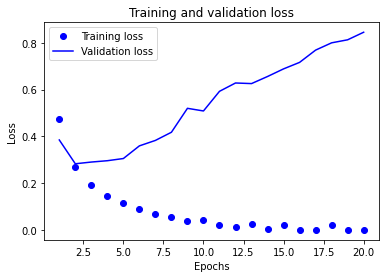

In [100]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

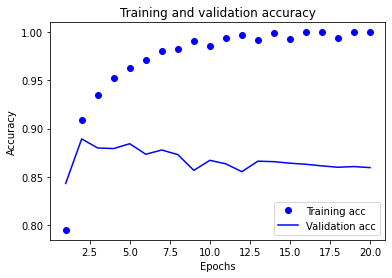

In [101]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.3198 - accuracy: 0.9432
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1625 - accuracy: 0.9613
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1180 - accuracy: 0.9679
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.9722
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0816 - accuracy: 0.9754
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0701 - accuracy: 0.9793
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0589 - accuracy: 0.9832
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.6481 - accuracy: 0.8494


[0.6480789184570312, 0.8493599891662598]

Regularisation

In [103]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5555 - accuracy: 0.7891 - val_loss: 0.4260 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3545 - accuracy: 0.8991 - val_loss: 0.3985 - val_accuracy: 0.8535
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2860 - accuracy: 0.9199 - val_loss: 0.3454 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2494 - accuracy: 0.9317 - val_loss: 0.3368 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2301 - accuracy: 0.9402 - val_loss: 0.3430 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2114 - accuracy: 0.9485 - val_loss: 0.3403 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2052 - accuracy: 0.9515 - val_loss: 0.3493 - val_accuracy: 0.8840
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

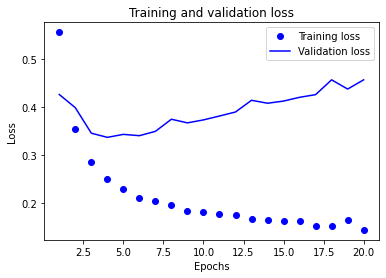

In [104]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

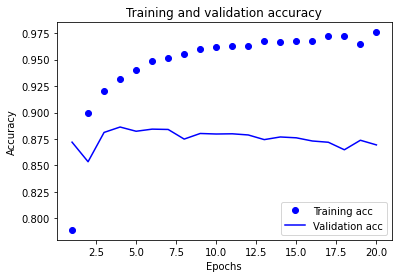

In [105]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2623 - accuracy: 0.9303
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2225 - accuracy: 0.9415
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2087 - accuracy: 0.9448
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2016 - accuracy: 0.9477
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1962 - accuracy: 0.9490
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1879 - accuracy: 0.9524
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1906 - accuracy: 0.9495
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4404 - accuracy: 0.8662


[0.44039246439933777, 0.8662400245666504]

Dropout

In [107]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.6356 - accuracy: 0.6369 - val_loss: 0.5388 - val_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5206 - accuracy: 0.7653 - val_loss: 0.4322 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4350 - accuracy: 0.8245 - val_loss: 0.3658 - val_accuracy: 0.8728
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3753 - accuracy: 0.8605 - val_loss: 0.3158 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3257 - accuracy: 0.8905 - val_loss: 0.2890 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2861 - accuracy: 0.9085 - val_loss: 0.2955 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2558 - accuracy: 0.9230 - val_loss: 0.2849 - val_accuracy: 0.8833
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

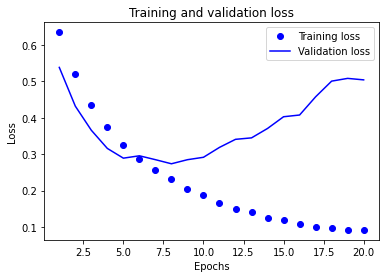

In [108]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Plotting graph between Training and Validation accuracy

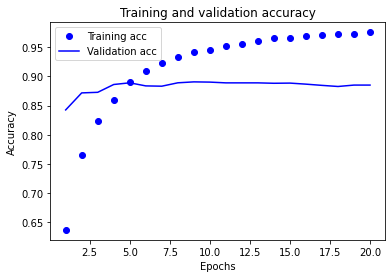

In [109]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [110]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2683 - accuracy: 0.9287
Epoch 2/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2220 - accuracy: 0.9364
Epoch 3/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1945 - accuracy: 0.9423
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1739 - accuracy: 0.9486
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1635 - accuracy: 0.9524
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1554 - accuracy: 0.9537
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1452 - accuracy: 0.9569
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4788 - accuracy: 0.8699


[0.4787777066230774, 0.869920015335083]

Training the model with Hypertuned Parameters

In [111]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.2390 - accuracy: 0.6173 - val_loss: 0.1702 - val_accuracy: 0.8480
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1782 - accuracy: 0.7744 - val_loss: 0.1195 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1372 - accuracy: 0.8483 - val_loss: 0.0975 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1105 - accuracy: 0.8843 - val_loss: 0.1016 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0905 - accuracy: 0.9085 - val_loss: 0.0954 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0792 - accuracy: 0.9245 - val_loss: 0.0953 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0682 - accuracy: 0.9353 - val_loss: 0.0981 - val_accuracy: 0.8846
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

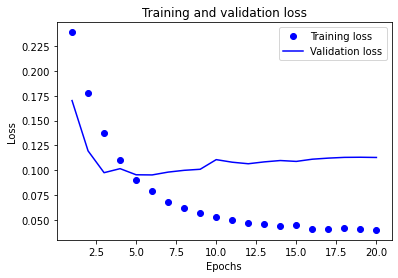

In [112]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

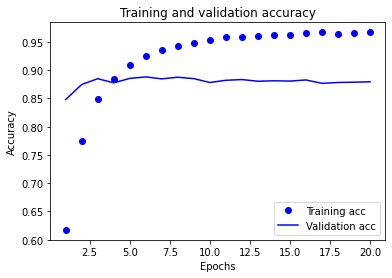

In [113]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [114]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0736 - accuracy: 0.9242
Epoch 2/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0662 - accuracy: 0.9331
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0622 - accuracy: 0.9382
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0591 - accuracy: 0.9426
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0569 - accuracy: 0.9464
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0554 - accuracy: 0.9468
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0536 - accuracy: 0.9490
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1108 - accuracy: 0.8755


[0.11082746088504791, 0.8755199909210205]

The summary for all models

In [115]:
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularisation[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularisation[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularisation','model_tanh']

plt.clf()

<Figure size 432x288 with 0 Axes>

Let's compare all the models using a graph

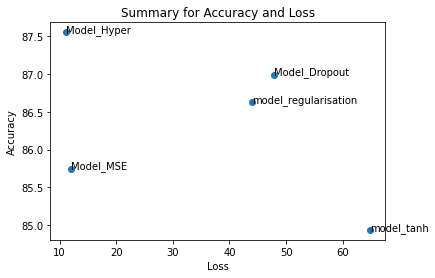

In [116]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()